In [1]:
from ripser import ripser
from persim import plot_diagrams
import numpy as np
from numpy import pi,cos,sin
import matplotlib.pyplot as plt
import random

In [28]:
def get_pixels(num_pixels, window_size):
    sample = list(np.linspace(-window_size/2, window_size/2, num_pixels))
    pixels = []
    for i in range(len(sample)):
        for j in range(len(sample)):
            pixels.append((sample[i],sample[j]))     
    return pixels


def get_colors(pixels, image_function):
    colors = []
    for pixel in pixels:
        colors.append(image_function(pixel[0],pixel[1]))
    return colors  

def translation(a,b):
    def t_ab(x,y): 
        return x+a, y+b
    return t_ab

def rotation(theta):
    def r_theta(x,y):
        return x * cos(theta) - y * sin(theta), x * sin(theta) + y * cos(theta)
    return r_theta

def isom(a,b,theta):
    def iso(x,y):
        r = rotation(theta)
        t = translation(a,b)
        return t(r(x,y)[0], r(x,y)[1])
    return iso

def generate_isom(n_isos, x_translate, y_translate):
    a = list(2 * x_translate * np.random.random(n_isos) - x_translate) # sampling from (-x,x)
    b = list(2 * y_translate * np.random.random(n_isos) - y_translate) # sampling from (-y,y)
    theta = list(2 * pi * np.random.random(n_isos)) # sampling from (0, 2pi)

    isos = []
    isos_inv = []
    for i in range(n_isos):
        isos.append(isom(a[i], b[i], theta[i]))
        isos_inv.append(isom(-1 * a[i],-1 * b[i],2 * pi - theta[i])) 
    return isos_inv

def new_colors(pixels, iso_inv, image_function):
    pixels_inv = []
    for pixel in pixels: 
        pixels_inv.append(iso_inv(pixel[0], pixel[1]))
    new_colors = get_colors(pixels_inv, image_function)
    return new_colors

def matrix_of_images(pixels, isos_inv, image_function):
    vectors = []
    for i in isos_inv:
        vectors.append([new_colors(pixels, i, image_function)])
    M = np.concatenate(vectors, axis=0 )
    return M

def p_hom(M, maxdim, coeff):
    output = ripser(M, maxdim = maxdim, coeff = coeff)
    return output
    
def persistent_H1_intervals(output):
    H1 = output['dgms'][1].tolist() # all intervals in H1
    d = []
    for pair in H1: 
        d.append(pair[1] - pair[0]) # finding lengths of intervals in H1
    d.sort(reverse = True) # sorting from longest to shortest intervals
    d
    return d

def plot_dgms(output):
    dgms = output['dgms']
    fig = plt.figure(figsize = (12, 6))
    plot_diagrams(dgms)
    
def pipeline(image_function, num_pixels, window_size, n_isos, x_translate, y_translate, maxdim, coeff):
    pixels = get_pixels(num_pixels, window_size)
    isos_inv = generate_isom(n_isos, x_translate, y_translate)
    M = matrix_of_images(pixels, isos_inv, image_function)
    output = p_hom(M, maxdim, coeff)
    return output

def graph(image_function, x, y, x_random = True, n_samples= 100000, y_random = True):
    
    if x_random == True:
        X = list(2 * x * np.random.random(n_samples) - x) 
        if y_random == True:
            Y = list(2 * y * np.random.random(n_samples) - y) 
        else:
            Y = np.linspace(-y,y,n_samples)      

    if x_random == False:
        X = np.linspace(-x,x,n_samples)
        if y_random == True:
            Y = list(2 * y * np.random.random(n_samples) - y) 
        else:
            Y = np.linspace(-y,y,n_samples)   

    points = []
    for i in range(n_samples):
        color = image_function(X[i],Y[i])
        if color == 1:
            points.append((X[i],Y[i])) 
        
    x_points = []
    y_points = []
    for i in points: 
        x_points.append(i[0])
        y_points.append(i[1])
        
    fig = plt.figure(figsize = (10, 7))
    ax = plt.axes()
    ax.scatter(x_points, y_points)
    plt.show()
    
def view_window(image_function, num_pixels, window_size):
    
    pixels = get_pixels(num_pixels, window_size)

    points = []
    for pixel in pixels:
        color = image_function(pixel[0],pixel[1])
        if color == 1:
            points.append(pixel)
    
    x_points = []
    y_points = []
    for pixel in points:
        x_points.append(pixel[0])
        y_points.append(pixel[1])
    
    fig = plt.figure(figsize = (7, 7))
    ax = plt.axes()
    ax.scatter(x_points, y_points)
    plt.show()

In [35]:
def triangles(x,y): 
    ret = 0 
    for a in range(10):
        if -0.1 + a * (3 ** 0.5) <= y <= 0.1 + a * (3 ** 0.5):
            ret = 1
        if -0.1 - a * (3 ** 0.5) <= y <= 0.1 - a * (3 ** 0.5):
            ret = 1
        if (3 ** 0.5 * x - 0.1) + 2 * a * (3 ** 0.5) <= y <= (3 ** 0.5 * x + 0.1) + 2 * a * (3 ** 0.5):
            ret = 1
        if (3 ** 0.5 * x - 0.1) + 2 * (-a) * (3 ** 0.5) <= y <= (3 ** 0.5 * x + 0.1) + 2 * (-a) * (3 ** 0.5):
            ret = 1
        if (-3 ** 0.5 * x - 0.1)+ 2 * a * (3 ** 0.5) <= y <= (-3 ** 0.5 * x + 0.1) + 2 * a * (3 ** 0.5):
            ret = 1
        if (-3 ** 0.5 * x - 0.1)+ 2 * (-a) * (3 ** 0.5) <= y <= (-3 ** 0.5 * x + 0.1) + 2 * (-a) * (3 ** 0.5):
            ret = 1
    return ret

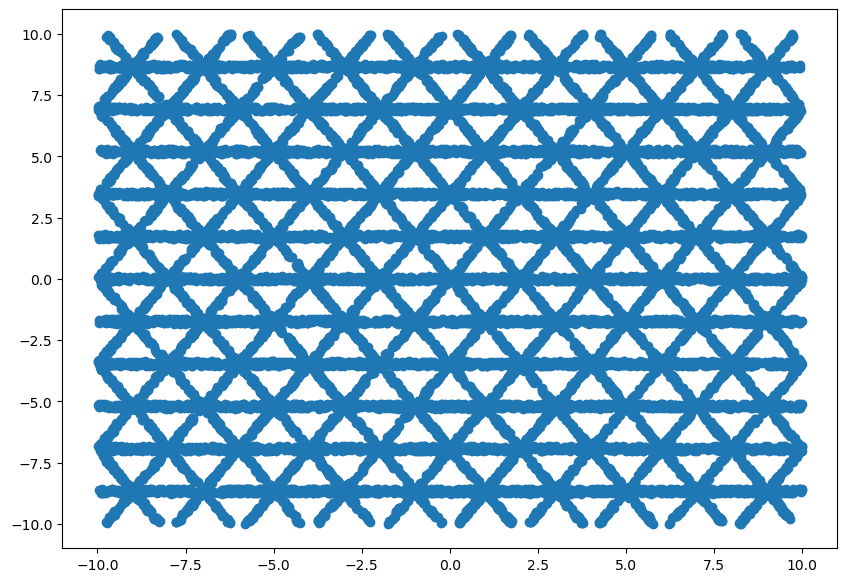

In [36]:
graph(triangles, 10, 10, x_random = True, n_samples= 100000, y_random = True)

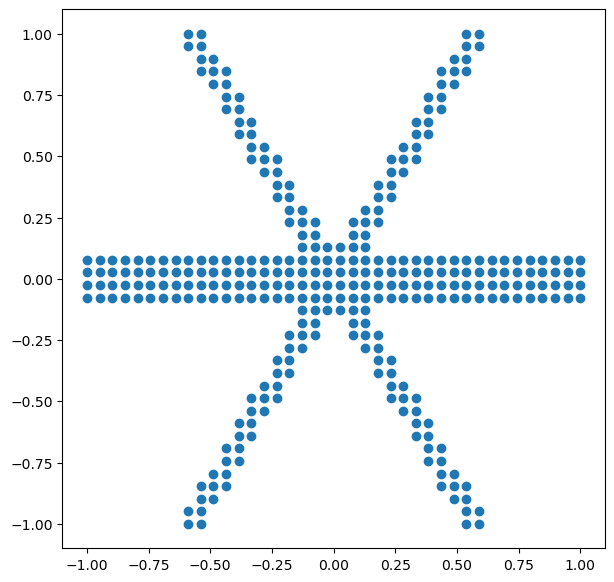

In [37]:
view_window(triangles, 40, 2)

In [44]:
output = pipeline(image_function=triangles, num_pixels=40, window_size=5, n_isos=1000, x_translate=5, y_translate=5, maxdim=1, coeff=2)

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


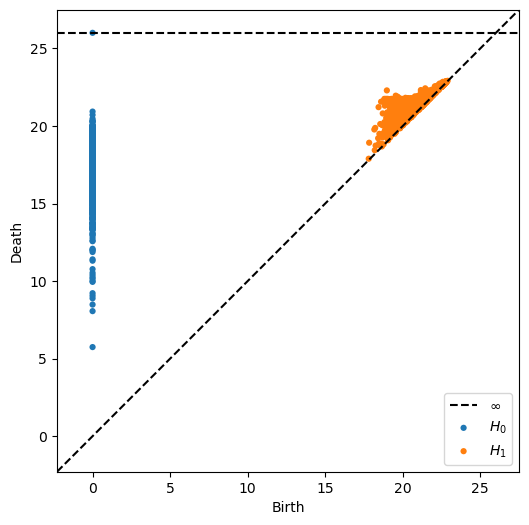

In [45]:
plot_dgms(output)

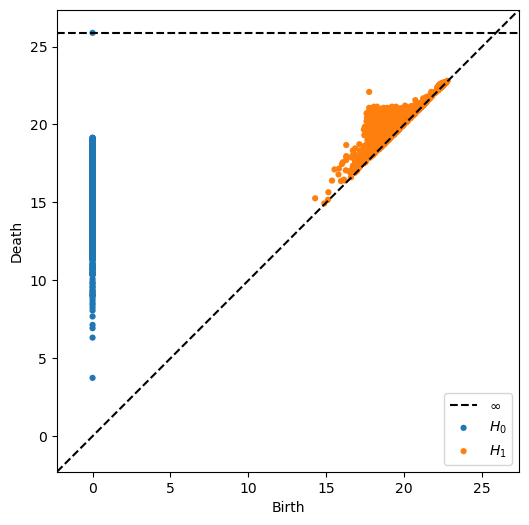

In [46]:
output = pipeline(image_function=triangles, num_pixels=40, window_size=5, n_isos=3000, x_translate=5, y_translate=5, maxdim=1, coeff=2)
plot_dgms(output)

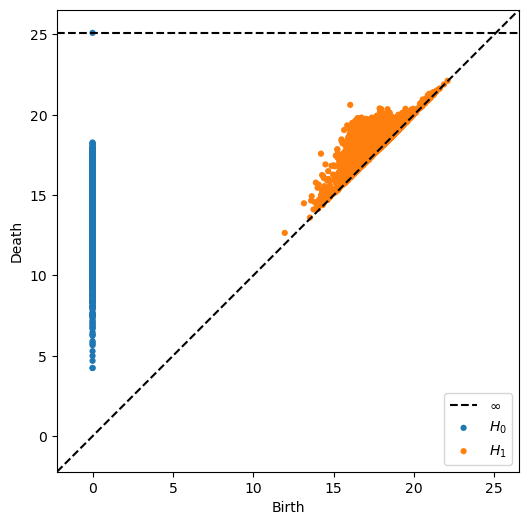

In [47]:
output = pipeline(image_function=triangles, num_pixels=40, window_size=3, n_isos=5000, x_translate=5, y_translate=5, maxdim=1, coeff=2)
plot_dgms(output)

**More isometries gives clearer persistence diagrams**

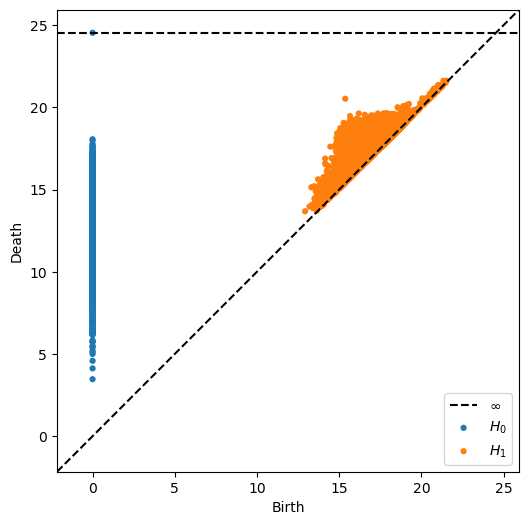

In [48]:
output = pipeline(image_function=triangles, num_pixels=40, window_size=3, n_isos=7000, x_translate=5, y_translate=5, maxdim=1, coeff=2)
plot_dgms(output)

### seems like there is one homology class in H1 over $\mathbb{Z}_2$

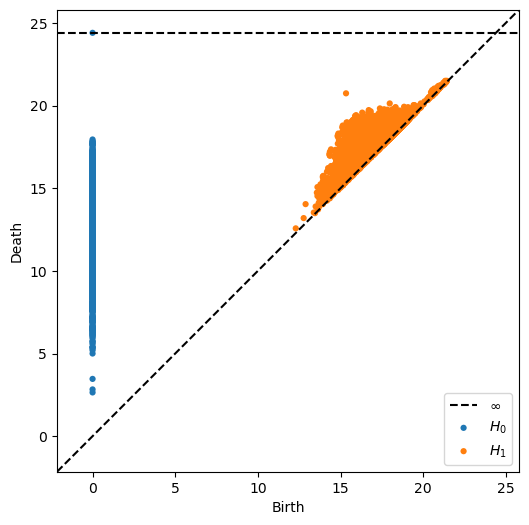

In [49]:
output = pipeline(image_function=triangles, num_pixels=40, window_size=3, n_isos=7000, x_translate=5, y_translate=5, maxdim=1, coeff=3)
plot_dgms(output)

### so it should be C6!